# **THE SPARKS FOUNDATION**

**TASK1 - PREDICTION USING SUPERVISED ML**


Predicting the percentage of a student based on the number of study hours.



**CODE WRITER/AUTHOR - Vendra.Kumar Raja**

In [4]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Matplotlib is building the font cache; this may take a moment.


In [5]:
#reading data from given student data
student_data = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
student_data.head(13)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Checking for Null values in the given dataset
student_data.isnull == True

False

**As there are no null values in the dataset, we can now proceed to visualization**

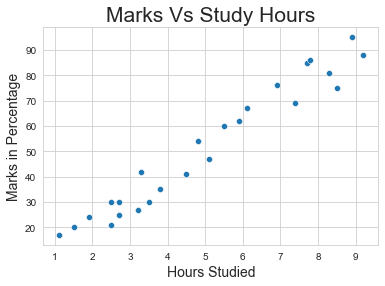

In [7]:
sns.set_style('whitegrid')
sns.scatterplot(x= student_data['Hours'],y= student_data['Scores'])
plt.title('Marks Vs Study Hours',size=21)
plt.xlabel('Hours Studied', size=14)
plt.ylabel('Marks in Percentage', size=14)
plt.show()

**From The above Scatter plot it apppears that there is  correlation between "Marks in percentage" and "Hours Studied".**

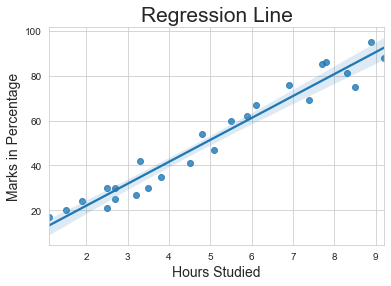

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
#plotting a regression line to confirm correlation
sns.regplot(x= student_data['Hours'], y= student_data['Scores'])
plt.title('Regression Line',size=21)
plt.xlabel('Hours Studied', size=14)
plt.ylabel('Marks in Percentage', size=14)
plt.show()
print(student_data.corr())

variables are  positively correlated

# TRAINING THE MODEL

**1.DIVIDING THE DATA**

Dividing the data into **attributes**(inputs) and **labels**(outputs)


In [9]:
# Defining X and y from the student Data
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

In [10]:
# Spliting the Data into training and test sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**2. FITTING DATA INTO THE MODEL**

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model is Trained Successfully ")

Model is Trained Successfully 


**PREDICTING THE PERCENTAGE OF MARKS**

In [12]:
predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# COMPARING THE BIAS BETWEEN THE MARKS (PREDICTED AND ACTUAL MARKS)

In [13]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**COMPARING THE BIAS BETWEEN ACTUAL AND PREDICTED MARKS VISUALLY**

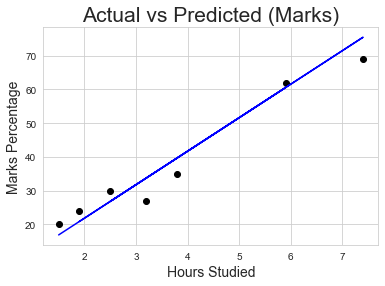

In [14]:
plt.scatter(x=val_X, y=val_y, color='Black')
plt.plot(val_X, predict_y, color='Blue')
plt.title('Actual vs Predicted (Marks)', size=21)
plt.xlabel('Hours Studied', size=14)
plt.ylabel('Marks Percentage', size=14)
plt.show()

**TESTING/EVALUATING THE MODEL**

In [15]:
# Calculating the accuracy of the model
print('Mean absolute error of the model: ',mean_absolute_error(val_y,predict_y))

Mean absolute error of the model:  4.130879918502486


value of **Mean absolute error is very small**.It implies that chances of error or wrong forecasting through the model are **very less**.

# **What will be the predicted score if a student studies for 9.25 hrs/ day?**

In [17]:
hours = [9.25]
result = regression.predict([hours])
print("Score if a student studies for 9.25 hrs/ day = {}".format(round(result[0],3)))

Score if a student studies for 9.25 hrs/ day = 93.893


According to the above regression model the predicted score if a student studies for **9.25 hrs/ day** is **93.89 Marks**